In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import svm, metrics
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow import keras

import skimage.io as io
from skimage.io import imread
from skimage.transform import resize
from PIL import Image

import os
from tqdm import tqdm
from glob import glob

In [32]:
#导入图像并转化为numpy数组
train_path = 'image/'
tumor_label=pd.read_csv('label.csv')
img_size = 200
label = []
nub_train = len(glob(train_path + '/*.jpg'))
image_data = np.zeros((nub_train,img_size,img_size,3),dtype=np.uint8)

i = 0   
for img_path in tqdm(glob(train_path + '/*.jpg')):
    img = Image.open(img_path)
    img = img.resize((img_size,img_size)) #图片resize
    arr = np.asarray(img) #图片转array
    image_data[i, :, :, :] = arr #赋值
    i += 1

for i in range(3000):
    data = tumor_label['label'][i]
    if data == 'no_tumor':
        label.append(0)
    else :
        label.append(1)    
    
    
image_data = np.array(image_data,dtype='float32')/255.0
label = np.array(label)

100%|██████████| 3000/3000 [00:11<00:00, 250.61it/s]


In [36]:
image_data.shape

(3000, 200, 200, 3)

In [37]:
#image_data = image_data.reshape(image_data.shape[0],-1)

In [39]:
x_train, x_test, y_train, y_test = train_test_split(image_data, label, test_size=0.2, random_state=3)

In [40]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=3)

In [41]:
y_train.shape

(1800,)

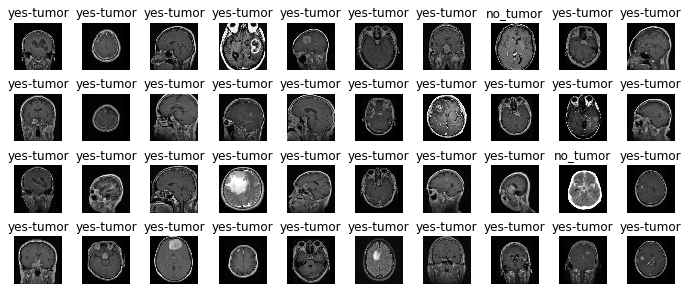

In [47]:
class_names = ["no_tumor", "yes-tumor"]
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(x_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.savefig('tumor')
plt.show()


In [43]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[200, 200,3]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
]) 

In [44]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 120000)            0         
_________________________________________________________________
dense (Dense)                (None, 300)               36000300  
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 36,030,501
Trainable params: 36,030,501
Non-trainable params: 0
_________________________________________________________________


In [46]:
#keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [48]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [49]:
model.get_layer(hidden1.name) is hidden1

True

In [50]:
weights, biases = hidden1.get_weights()

In [51]:
weights

array([[ 2.3243562e-03, -8.3324919e-04, -2.0779599e-03, ...,
        -2.6256768e-03,  3.6632367e-03, -6.5397732e-03],
       [ 4.5232289e-04, -2.9477892e-03, -5.5690375e-03, ...,
         5.7236571e-04, -2.6235217e-03, -3.9539831e-03],
       [-5.8751940e-03, -6.5517011e-03,  6.7419200e-03, ...,
        -4.0231291e-03,  6.7601199e-03, -6.9595962e-03],
       ...,
       [ 3.2687676e-03,  2.0483742e-04,  1.4013886e-03, ...,
         1.1313860e-03, -5.0236136e-03, -3.3352633e-03],
       [-3.9596711e-03, -6.0264161e-04,  6.8177371e-03, ...,
        -3.2139306e-03,  2.7037649e-03, -7.3992275e-04],
       [-2.4030772e-03, -6.4954516e-03,  2.4057366e-04, ...,
         6.5069296e-03, -5.6633726e-05,  2.2605141e-03]], dtype=float32)

In [52]:
weights.shape

(120000, 300)

In [53]:
biases.shape

(300,)

In [54]:
model.compile(loss="binary_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [55]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val))

Epoch 1/30
57/57 [==============================] - 4s 70ms/step - loss: 0.4991 - accuracy: 0.8411 - val_loss: 0.8248 - val_accuracy: 0.1483
Epoch 2/30
57/57 [==============================] - 4s 68ms/step - loss: 0.4530 - accuracy: 0.8367 - val_loss: 0.4864 - val_accuracy: 0.8533
Epoch 3/30
57/57 [==============================] - 4s 69ms/step - loss: 0.4225 - accuracy: 0.8406 - val_loss: 0.4449 - val_accuracy: 0.8600
Epoch 4/30
57/57 [==============================] - 4s 69ms/step - loss: 0.3939 - accuracy: 0.8461 - val_loss: 0.6912 - val_accuracy: 0.5317
Epoch 5/30
57/57 [==============================] - 4s 68ms/step - loss: 0.3506 - accuracy: 0.8517 - val_loss: 0.3886 - val_accuracy: 0.9017
Epoch 6/30
57/57 [==============================] - 4s 69ms/step - loss: 0.2885 - accuracy: 0.8911 - val_loss: 0.3549 - val_accuracy: 0.8700
Epoch 7/30
57/57 [==============================] - 4s 69ms/step - loss: 0.2720 - accuracy: 0.8978 - val_loss: 0.4168 - val_accuracy: 0.8017
Epoch 8/30
57

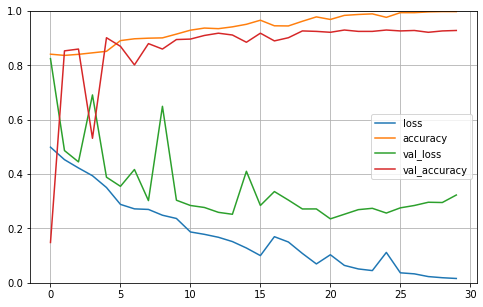

In [56]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [57]:
model.evaluate(x_test, y_test)

19/19 [==============================] - 0s 15ms/step - loss: 0.1920 - accuracy: 0.9400


[0.19200538098812103, 0.9399999976158142]

In [58]:
X_new = x_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[1.],
       [1.],
       [1.]], dtype=float32)

In [59]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([0, 0, 0], dtype=int64)

In [60]:
np.array(class_names)[y_pred]

array(['no_tumor', 'no_tumor', 'no_tumor'], dtype='<U9')

In [61]:
y_new = y_test[:3]
y_new

array([1, 1, 1])

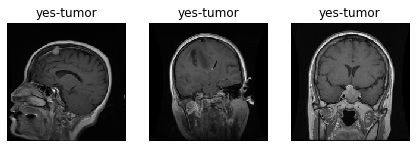

In [62]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
#save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()